If you have not installed scikit-learn so far:<br>
Anaconda users: **conda install scikit-learn=0.20.0**<br>
Others: **pip install scikit-learn=0.20.0**<br>
*Please use the suggested version to avoid any related issues, once you finish the course, you can always try other versions, they are not very different* <br>
**Thanks**


# Multiple Linear Regression with Python using Scikit-Learn

Hi guys,<br>

Very warm welcome to the Linear Regression with python using scikit-learn lecture. In the theory lecture, we have leaned the key concepts and working principle behind the Linear Regression (Supervised Machine Learning) model. Its time to learn by doing.<br>

&#9989;** I am very excited because you have put tremendous amount efforts to come to this stage, where we are doing our first Machine Learning project. We will go through the process step-by-step. It is important, so that we understand the next lectures without going through these steps in details. However, we will revise these steps, several times, along our way in the machine learning section. ** 

Let's start with a very famous and real dataset. Our task is to built a machine learning model to predict the housing price in Boston area. This housing dataset is a part of scikit-learn and also available on kaggle for you to download. A .csv file is also included in the course material. 
[Boston Housing Dataset on kaggle](https://www.kaggle.com/heptapod/uci-ml-datasets/data). Let's use use the one which is already included in the scikit-learn dataset repository, so that, you get to know the process to load the built-in datasets from scikit-learn as well.  

**Let's start by creating a real life situation!**
You are hired by a real estate company to help them in their business goals. The company wants you to predict the housing prices in Boston area. Based on the community and safety issues, some areas are in demand. The company is interested in some kind of automated way of suggesting the price of a house based on its features.<br>

You are given a dataset that contain features such as crime rate by town, proportion of residential land, nitric oxide concentration, age of the house, property tax so on.... <br>

You are happy to help because you got a job to do!<br>

Now, when you look at the dataset, you think that the linear regression is a good model to work with in this type of problem. <br>

You have the data, lets start working on the model!<br>



Details of the full list of features is given below:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per USD 10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000's


### Let's import the libraries we need

We are already familiar with these ones!

In [1]:
# We are already familiar with these ones!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Related to scikit learn, Python machine learning module 
# to work with the built-in datasets
from sklearn import datasets 

**Let's load the built-in housing price dataset, "boston" into "bh"**

In [3]:
bh = datasets.load_boston()

In [4]:
bh

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

**boston dataset is essentially a dictionary, let's check its keys**

In [5]:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**Let's create a pandas dataframe with features as column's name and also add target as another column, price.** 

In [6]:
df=pd.DataFrame(data=bh.data,columns=bh.feature_names)
df['price']=bh.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Let's get some information on the data, using info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Let's have a quick view on some of the statistical information of our dataset 

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Let's do some Exploratory Data Analysis (EDA)
**It is very important to know the data, let's see how the data look like.**<br>
Let's see how the price is distributed!

Text(0, 0.5, 'count')

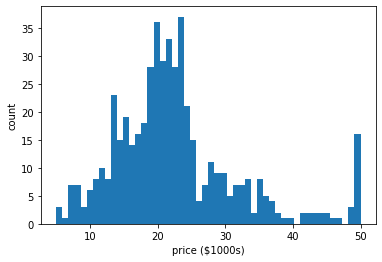

In [9]:
# Housing price (target) histogram 
#plt.figure(figsize=(4, 3))
plt.hist(df['price'], bins=50)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
#plt.tight_layout()

In [10]:
X = df[['ZN','CRIM','RM','AGE','LSTAT','DIS']]
y = df['price']

In [12]:
X

,ZN,CRIM,RM,AGE,LSTAT,DIS
0,18.0,0.00632,6.575,65.2,4.98,4.0900
1,0.0,0.02731,6.421,78.9,9.14,4.9671
2,0.0,0.02729,7.185,61.1,4.03,4.9671
3,0.0,0.03237,6.998,45.8,2.94,6.0622
4,0.0,0.06905,7.147,54.2,5.33,6.0622
...,...,...,...,...,...,...
501,0.0,0.06263,6.593,69.1,9.67,2.4786
502,0.0,0.04527,6.120,76.7,9.08,2.2875
503,0.0,0.06076,6.976,91.0,5.64,2.1675
504,0.0,0.10959,6.794,89.3,6.48,2.3889


# Linear Regression Model Training
Excited!<br>
Time to create/train our model!<br>

### Train Test Split 
Now we have features in X and target (price) in y. <br>
Next step is to split the data into a training set (`X_train` & `y_train`) and a testing set (`X_test` & `y_test`). <br>
We will train our model on the training dataset in `X_train` & `y_train` and then use the test dataset `X_test` & `y_test` to evaluate the model.<br>
`Scikit-learn` already has a method `train_test_split`, let's import this built-in method and do the split.<br>
We will pass our `test train data` to `train_test_split` and tell the `test_size`, which is the % of the dataset that we want in the `test data`. <br>
&#9758; Shift+Tab and copy paste train-test split!<br>
Let's leave the standard `test_size = 0.33` and `random_state = 42` at the moment. 
* *For the same data, the random_state = some number will make sure that you are getting same split if you pass the same number. if you pass the same number as mine, you will get the same results for the same data. If you pass a different random_state, you may not get the same results but it does not mean your results are not correct! This [stackflow](https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn) may help to understand more on the randon_state* 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
# let's check the head of X_train, just for a quick look
X_train

,ZN,CRIM,RM,AGE,LSTAT,DIS
178,0.0,0.06642,6.860,74.4,6.92,2.9153
447,0.0,9.92485,6.251,96.6,16.44,2.1980
445,0.0,10.67180,6.459,94.8,23.98,1.9879
359,0.0,4.26131,6.112,81.3,12.67,2.5091
281,20.0,0.03705,6.968,37.2,4.59,5.2447
...,...,...,...,...,...,...
63,25.0,0.12650,6.762,43.4,9.50,7.9809
326,0.0,0.30347,6.312,28.9,6.15,5.4159
337,0.0,0.03041,5.895,59.6,10.56,5.6150
11,12.5,0.11747,6.009,82.9,13.27,6.2267


In [18]:
X_test

,ZN,CRIM,RM,AGE,LSTAT,DIS
195,80.0,0.01381,7.875,32.0,2.97,5.6484
4,0.0,0.06905,7.147,54.2,5.33,6.0622
434,0.0,13.91340,6.208,95.0,15.17,2.2222
458,0.0,7.75223,6.301,83.7,16.23,2.7831
39,75.0,0.02763,6.595,21.8,4.32,5.4011
...,...,...,...,...,...,...
257,20.0,0.61154,8.704,86.9,5.12,1.8010
349,40.0,0.02899,6.939,34.5,5.89,8.7921
289,52.5,0.04297,6.565,22.9,9.51,7.3172
121,0.0,0.07165,6.004,84.1,14.27,2.1974


In [20]:
y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
257    50.0
349    26.6
289    24.8
121    20.3
9      18.9
Name: price, Length: 167, dtype: float64

## Creating and Training the Model
**OK!<br>
Now we have `train (X_train, y_train)` and `test (X_test, y_test)datasets`, Let's create the model.**<br>

First thing first, we need linear regression model to train on our dataset! right?.<br> 

It's easy, let's import `linear_model` family from the `sklearn` so that we can use its member `LinearRegression` for our data. <br> <br>


*<font style="font-size:14px;color:green;"> We can use `from sklearn.linear_model import LinearRegression` as well and than use `lm = LinearRegression()`</font>*

In [23]:
#LinearRegression model is a part of linear_model
from sklearn.linear_model import LinearRegression

Let's create an instance for the LinerRegression model

In [24]:
lm = LinearRegression()

We have create an instance `lm` (LinearRegression object) to use. <br>
If you write `lm.` and press tab in the code cell, you will find the available options, we want to use `fit()` at the moment to train the model.

Training the model on our train dataset

In [25]:
lm.fit(X_train,y_train)

LinearRegression()

&#9758; We got the output above, our `LinearRegression` model has been trained on the provided data to the model!<br>

## Model Evaluation
Our model is trained, we need to evaluate our model. Let's evaluate the model by checking it's coefficients and how we can interpret them.

In [26]:
# print the intercept
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0.
print(lm.intercept_)

11.28782372786839


Coefficients relates each feature in the dataset, each feature will have a separate coefficient!<br>

In [27]:
# Let's grab the coefficients from our model 
lm.coef_

array([ 0.06266351, -0.12634129,  3.85449278, -0.00772815, -0.69962672,
       -1.07242786])

## Predictions from our Model
We have trained our model, discussed the coefficients which make some sense, now, its important to know how well the model is doing!<br>

Our model have never seen `X_test`, let's provide test data "`X_test`" to our created model and see what the predictions are. Once we get the predictions from the model, we can compare them with what we have in our `y_test`. <br>

In [20]:
y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
257    50.0
349    26.6
289    24.8
121    20.3
9      18.9
Name: price, Length: 167, dtype: float64

In [28]:
# Getting predictions from the model 
predictions = lm.predict(X_test)
predictions

array([38.27059686, 28.17801152, 19.72801736, 19.60909431, 32.42132497,
       31.7605167 , 37.86695697,  9.74734354, 31.91770127,  5.82058665,
       30.04596152, 16.36762886, 19.68356195, 20.63923075, 24.99409912,
       20.75633059,  7.36122584, 34.70949117, 27.96086517, 25.74580188,
       13.10868187, 17.62014672, 25.70050058, 27.39771379, 35.65082328,
       21.80401112, 27.09423635, 22.56037972, 24.77193188, 31.56783236,
       20.84949255, 20.77043726, 36.42183385, 38.75107318, 26.188578  ,
       21.96896818, 19.87303148, 20.14781319,  6.00306214, 28.80632269,
       21.65934266, 23.76768773, 34.88842779, 13.82884486, 19.53933199,
       25.52322238, 30.42975609, 19.46675806, 26.97443414, 23.78157211,
       31.27351575, 38.30698311, 20.35212261, 17.65619428, 30.36036451,
       -3.65636349, 19.92977729, 17.62462448, 18.09548251, 20.14898937,
       33.31193739,  4.03713551, 17.04739088, 21.27479056, 12.16103309,
       27.01126186, 23.90698457, 19.43092506, 17.36666362, 19.40

We already know the price of all homes with features in `X_test`, which is in `y_test`, let's plot `y_test` and predictions, scatter plot is a good option!

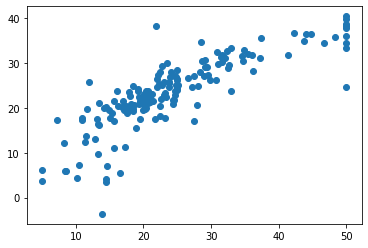

In [29]:
plt.scatter(y_test,predictions)

In [30]:
lm.score(X_test,y_test)

0.6709331863082428

# Excellent !
We are done with our very first Machine Learning project using `LinearRegression` model. <br>
**Good to do:**<br>
* Repeat the model using all features in the 'Boston housing dataset' and compare the difference with the results in this notebook.
* Repeat this model for another dataset `kc_house_data.csv` (provided in the material). This is another real dataset on house sales in King County, USA. 

Let's move on to the exercise project in which we will find out the quality of the wine based on different aspects!